In [1]:
import iris
import matplotlib.pyplot as plt
import iris.plot as iplt
import numpy as np
from iris.analysis.maths import multiply as mul
import cartopy.crs as ccrs

This notebook examines the EasyAerosol global and australia-region spatial means by height, time and lw/sw band

In [2]:
# regional mean over BARPA domain
data1=iris.load("/short/tp28/eh6215/volc/barpa_historical*")
data1 = iris.cube.CubeList([cube[...,:12].collapsed('time',iris.analysis.MEAN) for cube in data1])
iris.util.equalise_attributes(data1)
data1 = data1.merge()

In [5]:
# regional mean over BARPA domain
data2=iris.load("/short/tp28/eh6215/volc/barpa_ssp370*")
data2 = iris.cube.CubeList([cube[...,:12].collapsed('time',iris.analysis.MEAN) for cube in data2])
iris.util.equalise_attributes(data2)
data2 = data2.merge()

In [7]:
# regional mean over BARPA domain
data3=iris.load("/short/tp28/eh6215/volc/barpa_ssp126*")
data3 = iris.cube.CubeList([cube[...,:12].collapsed('time',iris.analysis.MEAN) for cube in data3])
iris.util.equalise_attributes(data3)
data3 = data3.merge()

In [13]:
iris.util.equalise_attributes(data2)
iris.util.equalise_attributes(data3)
data3 = data3.merge()
data2 = data2.merge()

In [14]:
data1
data2
data3

[<iris 'Cube' of asymmetry parameter of EasyAerosol / (1) (model_level_number: 2; waveband_0: 6)>,
<iris 'Cube' of absorption coefficient of EasyAerosol / (m-1) (model_level_number: 2; waveband_0: 6)>,
<iris 'Cube' of EasyAerosol cloud droplet number concentration / (m -3) (model_level_number: 2)>,
<iris 'Cube' of absorption coefficient of EasyAerosol / (m-1) (time: 85; model_level_number: 2; -- : 9)>,
<iris 'Cube' of asymmetry parameter of EasyAerosol / (1) (time: 85; model_level_number: 2; -- : 9)>,
<iris 'Cube' of extinction coefficient of EasyAerosol / (m-1) (time: 85; model_level_number: 2; -- : 9)>,
<iris 'Cube' of extinction coefficient of EasyAerosol / (m-1) (model_level_number: 2; waveband_0: 6)>,
<iris 'Cube' of asymmetry parameter of EasyAerosol / (1) (time: 84; model_level_number: 2; waveband_0: 6)>,
<iris 'Cube' of absorption coefficient of EasyAerosol / (m-1) (time: 84; model_level_number: 2; waveband_0: 6)>,
<iris 'Cube' of EasyAerosol cloud droplet number concentration / (m -3) (time: 84; model_level_number: 2)>,
<iris 'Cube' of extinction coefficient of EasyAerosol / (m-1) (time: 84; model_level_number: 2; waveband_0: 6)>]

In [3]:
# global means
data2=iris.load("/short/tp28/eh6215/volc/all*")
data2 = iris.cube.CubeList([cube[...,:12].collapsed('time',iris.analysis.MEAN) for cube in data])
data2 = data.merge()

In [4]:
sw = iris.cube.CubeList([cube for cube in data if cube.shape[-1]==6])
lw = iris.cube.CubeList([cube for cube in data if cube.shape[-1]==9])
print(sw)
print(lw)

volcts = sw[0][:,0,0].copy(data=[30.66666667, 50.58333333, 206.5833333, 1174.583333, 442.6666667, 226.4166667, 69.33333333, 238.4166667, 147.3333333, 46.58333333, 60.41666667, 187.8333333, 94.58333333, 34.91666667, 177.5833333, 254.8333333, 64.08333333, 63.66666667, 48.25, \
                                 50.41666667, 60, 79.08333333, 306.5, 272.8333333, 197.8333333, 116.0833333, 145.25, 85.83333333, 68.16666667, 49.91666667, 61.91666667, 591.9166667, 937.9166667, 468.6666667, 137.9166667, 70.33333333, 44.91666667, 36, 33.41666667, 33.16666667, \
                                 32.25, 31.5, 33.58333333, 36.91666667, 36, 53.5, 56.41666667, 49.83333333, 42.33333333, 47, 46.25, 49.75, 40.83333333, 34.75, 55.41666667, ])

0: absorption coefficient of EasyAerosol / (m-1) (time: 55; model_level_number: 85; waveband_0: 6)
1: asymmetry parameter of EasyAerosol / (1) (time: 55; model_level_number: 85; waveband_0: 6)
2: extinction coefficient of EasyAerosol / (m-1) (time: 55; model_level_number: 85; waveband_0: 6)
0: extinction coefficient of EasyAerosol / (m-1) (time: 55; model_level_number: 85; -- : 9)
1: asymmetry parameter of EasyAerosol / (1) (time: 55; model_level_number: 85; -- : 9)
2: absorption coefficient of EasyAerosol / (m-1) (time: 55; model_level_number: 85; -- : 9)


In [5]:
sw2 = iris.cube.CubeList([cube for cube in data2 if cube.shape[-1]==6])
lw2 = iris.cube.CubeList([cube for cube in data2 if cube.shape[-1]==9])
print(sw2)
print(lw2)

0: absorption coefficient of EasyAerosol / (m-1) (time: 55; model_level_number: 85; waveband_0: 6)
1: asymmetry parameter of EasyAerosol / (1) (time: 55; model_level_number: 85; waveband_0: 6)
2: extinction coefficient of EasyAerosol / (m-1) (time: 55; model_level_number: 85; waveband_0: 6)
0: extinction coefficient of EasyAerosol / (m-1) (time: 55; model_level_number: 85; -- : 9)
1: asymmetry parameter of EasyAerosol / (1) (time: 55; model_level_number: 85; -- : 9)
2: absorption coefficient of EasyAerosol / (m-1) (time: 55; model_level_number: 85; -- : 9)


/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1806: UserWarning: Coordinate 'model_level_number' is not bounded, guessing contiguous bounds.
  warnings.warn(


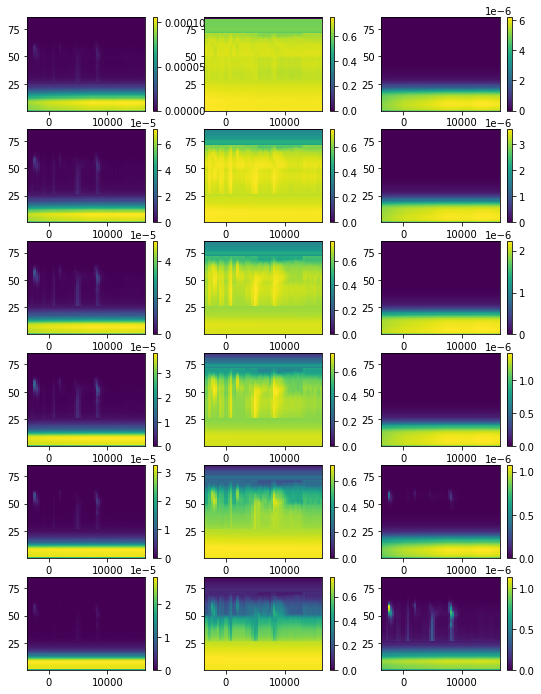

In [14]:
fig = plt.figure(figsize=(9,12))
for i,name in enumerate(["extinction coefficient of EasyAerosol","asymmetry parameter of EasyAerosol","absorption coefficient of EasyAerosol"]):
    for j in range(6):
        plt.subplot(6,3,i+1+j*3)
        iplt.pcolormesh(sw.extract_cube(name)[:,:,j])
        plt.colorbar()
        

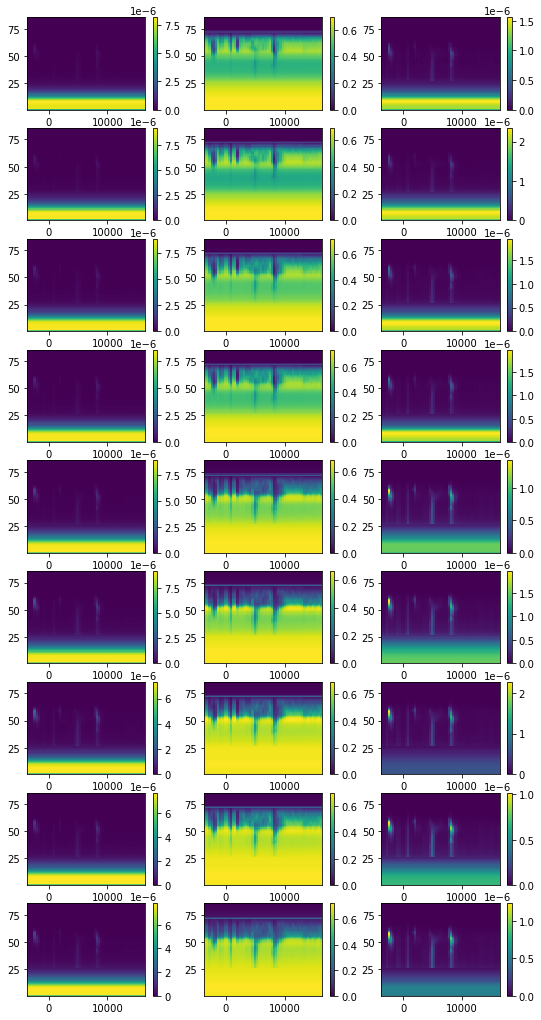

In [15]:
fig = plt.figure(figsize=(9,18))
for i,name in enumerate(["extinction coefficient of EasyAerosol","asymmetry parameter of EasyAerosol","absorption coefficient of EasyAerosol"]):
    for j in range(9):
        plt.subplot(9,3,i+1+j*3)
        iplt.pcolormesh(lw.extract_cube(name)[:,:,j])
        plt.colorbar()
        

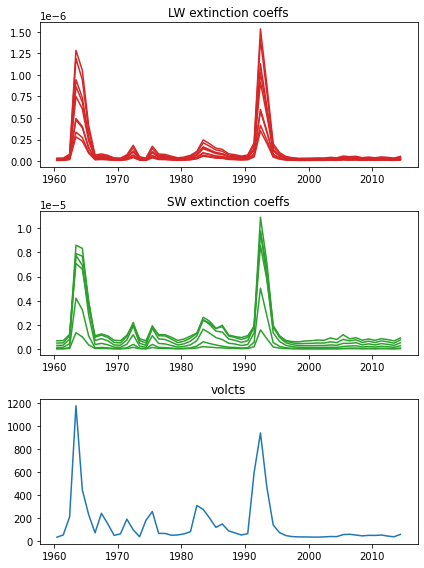

In [6]:
#for i in range(9):
#    iplt.plot(lw.extract_cube("absorption coefficient of EasyAerosol")[:,52,i],c='tab:blue')
fig = plt.figure(figsize=(6,8))
plt.subplot(311)    
plt.title("LW extinction coeffs")
for i in range(9):
    iplt.plot(lw.extract_cube("extinction coefficient of EasyAerosol")[:,52,i],c='tab:red')

plt.subplot(312)    
plt.title("SW extinction coeffs")
for i in range(6):
    iplt.plot(sw.extract_cube("extinction coefficient of EasyAerosol")[:,52,i],c='tab:green')

plt.subplot(313)
plt.title("volcts")
iplt.plot(volcts,c='tab:blue')
plt.tight_layout()

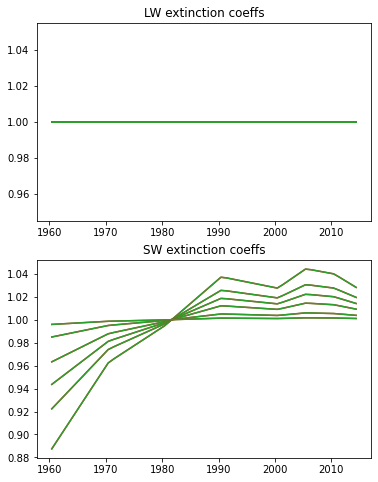

In [11]:
#for i in range(9):
#    iplt.plot(lw.extract_cube("absorption coefficient of EasyAerosol")[:,52,i],c='tab:blue')
fig = plt.figure(figsize=(6,8))
plt.subplot(211)    
plt.title("LW extinction coeffs")
for i in range(9):
    iplt.plot(lw.extract_cube("extinction coefficient of EasyAerosol")[:,11,i]/lw.extract_cube("extinction coefficient of EasyAerosol")[:,11,i].collapsed('time',iris.analysis.MEAN),c='tab:red')

for i in range(9):
    iplt.plot(lw2.extract_cube("extinction coefficient of EasyAerosol")[:,11,i]/lw2.extract_cube("extinction coefficient of EasyAerosol")[:,11,i].collapsed('time',iris.analysis.MEAN),c='tab:green')

plt.subplot(212)    
plt.title("SW extinction coeffs")
for i in range(6):
    iplt.plot(sw.extract_cube("extinction coefficient of EasyAerosol")[:,11,i]/sw.extract_cube("extinction coefficient of EasyAerosol")[:,11,i].collapsed('time',iris.analysis.MEAN),c='tab:red')
    iplt.plot(sw2.extract_cube("extinction coefficient of EasyAerosol")[:,11,i]/sw2.extract_cube("extinction coefficient of EasyAerosol")[:,11,i].collapsed('time',iris.analysis.MEAN),c='tab:green')



In [9]:
# Based on the above plots, it is sufficient to analyse SW Band 1 absorption at levels 11 and 52.
path = "/g/data/tp28/dev/barpa/ancils/easy_aerosol/gregorian/historical/"
cz = iris.Constraint(model_level_number = lambda x: x in [11,52])
hist = iris.load(path+"easy_extinction_sw_PI-MACv2-SP-CMIP6-Volc_*nc",cz)
hist = iris.cube.CubeList([cube[-12:,0].collapsed('time',iris.analysis.MEAN) for cube in hist])
hist = hist.merge_cube()

In [10]:
path = "/g/data/tp28/dev/barpa/ancils/easy_aerosol/gregorian/ssp370/"
cz = iris.Constraint(model_level_number = lambda x: x in [11,52])
ssp3 = iris.load(path+"easy_extinction_sw_PI-MACv2-SP-CMIP6-Volc_*nc",cz)
ssp3 = iris.cube.CubeList([cube[-12:,0].collapsed('time',iris.analysis.MEAN) for cube in ssp3])

In [12]:
iris.util.equalise_attributes(ssp3)
ssp3 = ssp3.merge_cube()

In [13]:
def calc_slope(y):
  n=y.shape[0]
  x = np.arange(1,n+1)
  xx = iris.coords.AuxCoord(x)
  xx.units = 1
  out = (n*mul(y,xx,0).collapsed('time',iris.analysis.SUM) \
        -y.collapsed('time',iris.analysis.SUM)*x.sum()) \
        /(n*(x**2).sum() - x.sum()**2)
  return out

In [15]:
delta = calc_slope(hist[:,0])

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


In [16]:
delta3 = calc_slope(ssp3[:,0])

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


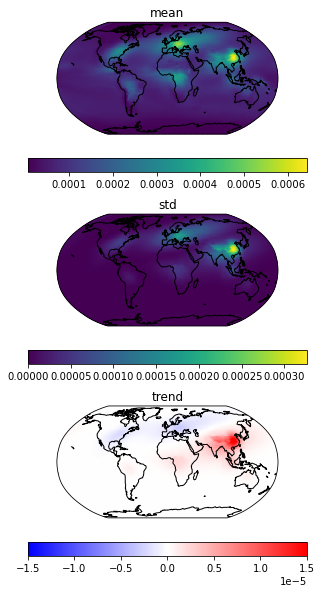

In [20]:
plt.figure(figsize=(5,10))

ax = plt.subplot(311,projection=ccrs.Robinson())
iplt.pcolormesh(hist[:,0].collapsed('time',iris.analysis.MEAN))
plt.colorbar(orientation='horizontal')
plt.title("mean")
ax.coastlines()
ax = plt.subplot(313,projection=ccrs.Robinson())
iplt.pcolormesh(delta,vmin=-1.5e-5,vmax=1.5e-5,cmap='bwr')
plt.colorbar(orientation='horizontal')
plt.title("trend")
ax.coastlines()
ax = plt.subplot(312,projection=ccrs.Robinson())
iplt.pcolormesh(hist[:,0].collapsed('time',iris.analysis.STD_DEV))
plt.colorbar(orientation='horizontal')
plt.title("std")
ax.coastlines()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'time'.
  warnings.warn(msg.format(self.name()))


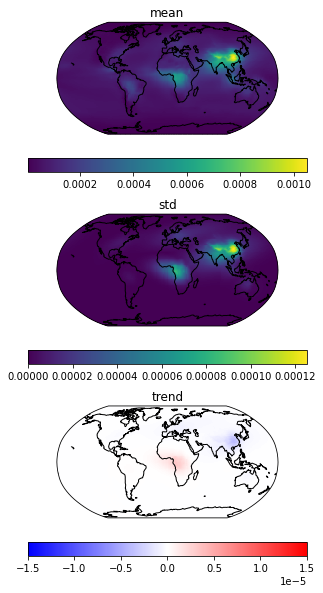

In [19]:
plt.figure(figsize=(5,10))

ax = plt.subplot(311,projection=ccrs.Robinson())
iplt.pcolormesh(ssp3[:,0].collapsed('time',iris.analysis.MEAN))
plt.colorbar(orientation='horizontal')
plt.title("mean")
ax.coastlines()
ax = plt.subplot(313,projection=ccrs.Robinson())
iplt.pcolormesh(delta3,vmin=-1.5e-5,vmax=1.5e-5,cmap='bwr')
plt.colorbar(orientation='horizontal')
plt.title("trend")
ax.coastlines()
ax = plt.subplot(312,projection=ccrs.Robinson())
iplt.pcolormesh(ssp3[:,0].collapsed('time',iris.analysis.STD_DEV))
plt.colorbar(orientation='horizontal')
plt.title("std")
ax.coastlines()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/cube.py:3523: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/cube.py:3523: UserWarning: Collapsing spatial coordinate 'latitude' without weighting
  warnings.warn(msg.format(coord.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/python3.9/site-packages/iris/coords.py:1982: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'latitude'.
  warnings.warn(msg.format(self.name()))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.10/lib/

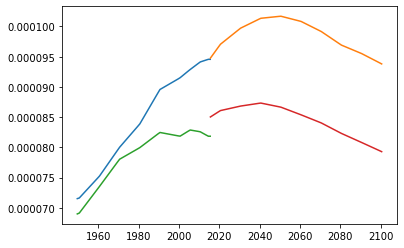

In [53]:
cx =iris.Constraint(longitude=lambda x:90<=x<=180)
cy = iris.Constraint(latitude=lambda y: -50<=y<=10)
iplt.plot(hist[:,0].extract(cx&cy).collapsed(['longitude','latitude'],iris.analysis.MEAN))
iplt.plot(ssp3[:,0].extract(cx&cy).collapsed(['longitude','latitude'],iris.analysis.MEAN))
cx =iris.Constraint(longitude=lambda x:110<=x<=160)
cy = iris.Constraint(latitude=lambda y: -50<=y<=-10)
iplt.plot(hist[:,0].extract(cx&cy).collapsed(['longitude','latitude'],iris.analysis.MEAN))
iplt.plot(ssp3[:,0].extract(cx&cy).collapsed(['longitude','latitude'],iris.analysis.MEAN))

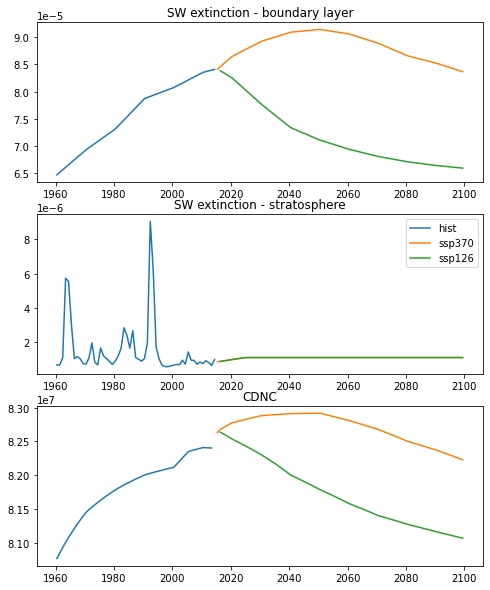

In [39]:

plt.figure(figsize=(8,10))
plt.subplot(311)
plt.title("SW extinction - boundary layer")
iplt.plot(data1.extract_cube("easy_extinction_sw")[:,0,0],label='hist')
iplt.plot(data2.extract_cube("easy_extinction_sw")[:,0,0],label='ssp370')
iplt.plot(data3.extract("easy_extinction_sw")[-1][:,0,0],label='ssp126')
plt.subplot(312)
plt.title("SW extinction - stratosphere")
iplt.plot(data1.extract_cube("easy_extinction_sw")[:,1,0],label='hist')
iplt.plot(data2.extract_cube("easy_extinction_sw")[:,1,0],label='ssp370')
iplt.plot(data3.extract("easy_extinction_sw")[-1][:,1,0],label='ssp126')
plt.legend()
plt.subplot(313)
plt.title("CDNC")
iplt.plot(data1.extract("EasyAerosol cloud droplet number concentration")[0][:,0],label='hist')
iplt.plot(data2.extract("EasyAerosol cloud droplet number concentration")[0][:,0],label='ssp370')
iplt.plot(data3.extract("EasyAerosol cloud droplet number concentration")[-1][:,0],label='ssp126')


In [25]:
data3

[<iris 'Cube' of asymmetry parameter of EasyAerosol / (1) (model_level_number: 2; waveband_0: 6)>,
<iris 'Cube' of absorption coefficient of EasyAerosol / (m-1) (model_level_number: 2; waveband_0: 6)>,
<iris 'Cube' of EasyAerosol cloud droplet number concentration / (m -3) (model_level_number: 2)>,
<iris 'Cube' of absorption coefficient of EasyAerosol / (m-1) (time: 85; model_level_number: 2; -- : 9)>,
<iris 'Cube' of asymmetry parameter of EasyAerosol / (1) (time: 85; model_level_number: 2; -- : 9)>,
<iris 'Cube' of extinction coefficient of EasyAerosol / (m-1) (time: 85; model_level_number: 2; -- : 9)>,
<iris 'Cube' of extinction coefficient of EasyAerosol / (m-1) (model_level_number: 2; waveband_0: 6)>,
<iris 'Cube' of asymmetry parameter of EasyAerosol / (1) (time: 84; model_level_number: 2; waveband_0: 6)>,
<iris 'Cube' of absorption coefficient of EasyAerosol / (m-1) (time: 84; model_level_number: 2; waveband_0: 6)>,
<iris 'Cube' of EasyAerosol cloud droplet number concentration / (m -3) (time: 84; model_level_number: 2)>,
<iris 'Cube' of extinction coefficient of EasyAerosol / (m-1) (time: 84; model_level_number: 2; waveband_0: 6)>]